In [1]:
import numpy as np
import pandas as pd
from seaborn import load_dataset, heatmap
import matplotlib.pyplot as plt

In [2]:
data = load_dataset('diamonds')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
data.isin(['',' ','-']).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [8]:
for col in ['cut','color','clarity']:
    print(data[col].unique())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


In [9]:
data = data.drop(columns=['color','clarity'])
data

,carat,cut,depth,table,price,x,y,z
0,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
data.dtypes

carat     float64
cut      category
depth     float64
table     float64
price       int64
x         float64
y         float64
z         float64
dtype: object

In [11]:
data['cut'].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [12]:
from sklearn.preprocessing import LabelEncoder
order = ['Fair', 'Good', 'Very Good','Premium','Ideal']
le = LabelEncoder()
data['cut'] = le.fit_transform(pd.Categorical(data['cut'], categories=order, ordered=True))
data

,carat,cut,depth,table,price,x,y,z
0,0.23,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,61.0,58.0,2757,6.15,6.12,3.74


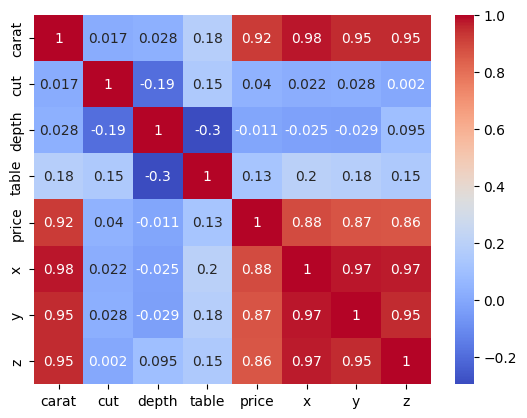

In [13]:
heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

carat, X, Y, Z are highly correlated with price. Those are the columns that we will use in the prediction.

In [14]:
data = data[['carat','x','y','z','price']]
data

,carat,x,y,z,price
0,0.23,3.95,3.98,2.43,326
1,0.21,3.89,3.84,2.31,326
2,0.23,4.05,4.07,2.31,327
3,0.29,4.20,4.23,2.63,334
4,0.31,4.34,4.35,2.75,335
...,...,...,...,...,...
53935,0.72,5.75,5.76,3.50,2757
53936,0.72,5.69,5.75,3.61,2757
53937,0.70,5.66,5.68,3.56,2757
53938,0.86,6.15,6.12,3.74,2757


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price']),data['price'],test_size=0.2,random_state=37)

In [17]:
model = LinearRegression()

model.fit(X_train,y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

Intercept: 1741.0623347449532
Coefficient: [10125.80223276  -829.60600924   133.57187726  -535.91564722]


In [18]:
y_pred = model.predict(X_test)

predictions = pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
predictions

,Actual,Predicted
11415,5000,9483.910400
26257,15714,15131.437398
49747,2156,3103.061548
38029,1010,783.701478
40750,1163,924.636315
...,...,...
24162,12338,11891.678506
34680,873,723.353833
21595,9698,10022.135403
4217,3568,3106.311297


In [19]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 2311199.76958435


In [20]:
r2 = r2_score(y_test,y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.854370291325574


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_with_const = add_constant(data)
vif = pd.DataFrame(
{'Column':df_with_const.columns,
'VIF': np.sqrt([variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])])}
)
vif

,Column,VIF
0,const,15.955763
1,carat,5.549881
2,x,6.948891
3,y,4.502452
4,z,4.232959
5,price,2.617824
